## Importing Libraries and Loading Our Data

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
%matplotlib inline
from python_files.fetch_missing_data import fetch_missing_data
from python_files.data import GetData
from python_files.basic_preprocessing import BasicPreprocessing
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [97]:
df = GetData().get_data()['AllMoviesDetailsCleaned']
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,belongs_to_collection
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,NaN,Villealfa Filmproduction Oy,Finland,...,suomi,Released,NaN,Ariel,7.1,40,2,1,2,NaN
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",NaN,Villealfa Filmproduction Oy,Finland,...,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3,NaN
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,NaN,Miramax Films,United States of America,...,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1,NaN
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",NaN,Universal Pictures,Japan,...,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1,NaN
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,NaN,inLoops,Austria,...,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5,NaN


In [98]:
df.shape

(329074, 23)

In [99]:
# Applying data cleaning from basic_preprocessing Python ()
# 1. keep only dataset with revenue greater than 3K and budget greater than 30k
# 2. Remove Duplicates
# 3.add column with 1 if movie belongs to any collection and 0 if it does not belong to any collection
# 4. Deal with missing Values
    # 4.1 Drop columns: 'popularity', 'tagline', 'overview', 'imdb_id', 'status', 'belongs_to_collection', 'spoken_languages'
    # 4.2 Drop all the rows where we release_date is misssing

df = BasicPreprocessing.apply(df)
df.head()

,id,budget,genres,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,collection
2,5,4000000,Crime|Comedy,en,Four Rooms,Miramax Films,United States of America,25/12/1995,4300000,98.0,Four Rooms,6.5,485,2,1,1,1
5,9,4000000,Drama,de,Sonntag im August,none,Germany,2/9/2004,4257354,15.0,Sunday in August,5.7,2256,0,1,1,1
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Lucasfilm,United States of America,25/05/1977,775398007,121.0,Star Wars,8.0,6168,2,1,1,1
7,12,94000000,Animation|Family,en,Finding Nemo,Pixar Animation Studios,United States of America,30/05/2003,940335536,100.0,Finding Nemo,7.6,5531,1,1,1,1
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,Paramount Pictures,United States of America,6/7/1994,677945399,142.0,Forrest Gump,8.2,7204,1,1,1,1


In [100]:
df.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number', 'collection'],
      dtype='object')

## Understanding the Dataset after Basic Pre-processing

### Selected Features 

* **id:** The ID of the move.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **title:** The Official Title of the movie.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.


### Dropped Features 
* **imdb_id:** The IMDB ID of the movie.
* **homepage:** The Official Homepage of the move.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.

** Reason to drop these features: irrelevant or information are not available before the movie released


In [101]:
df.shape

(8628, 17)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8628 entries, 2 to 328826
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8628 non-null   int64  
 1   budget                       8628 non-null   int64  
 2   genres                       8419 non-null   object 
 3   original_language            8628 non-null   object 
 4   original_title               8628 non-null   object 
 5   production_companies         8628 non-null   object 
 6   production_countries         8628 non-null   object 
 7   release_date                 8628 non-null   object 
 8   revenue                      8628 non-null   int64  
 9   runtime                      8612 non-null   float64
 10  title                        8628 non-null   object 
 11  vote_average                 8628 non-null   float64
 12  vote_count                   8628 non-null   int64  
 13  production_compa

There are a total of ~8.6k movies** with **17 features** after basic pre-processing and features selection

## Data Wrangling

Already done via basic pre-processing Python functions

In [103]:
# Calculating return
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape


(0, 18)

## Exploratory Data Analysis
### Title and Overview Wordclouds

In [104]:
df['title'] = df['title'].astype('str')
#df['overview'] = df['overview'].astype('str')

In [105]:
title_corpus = ' '.join(df['title'])
#overview_corpus = ' '.join(df['overview'])

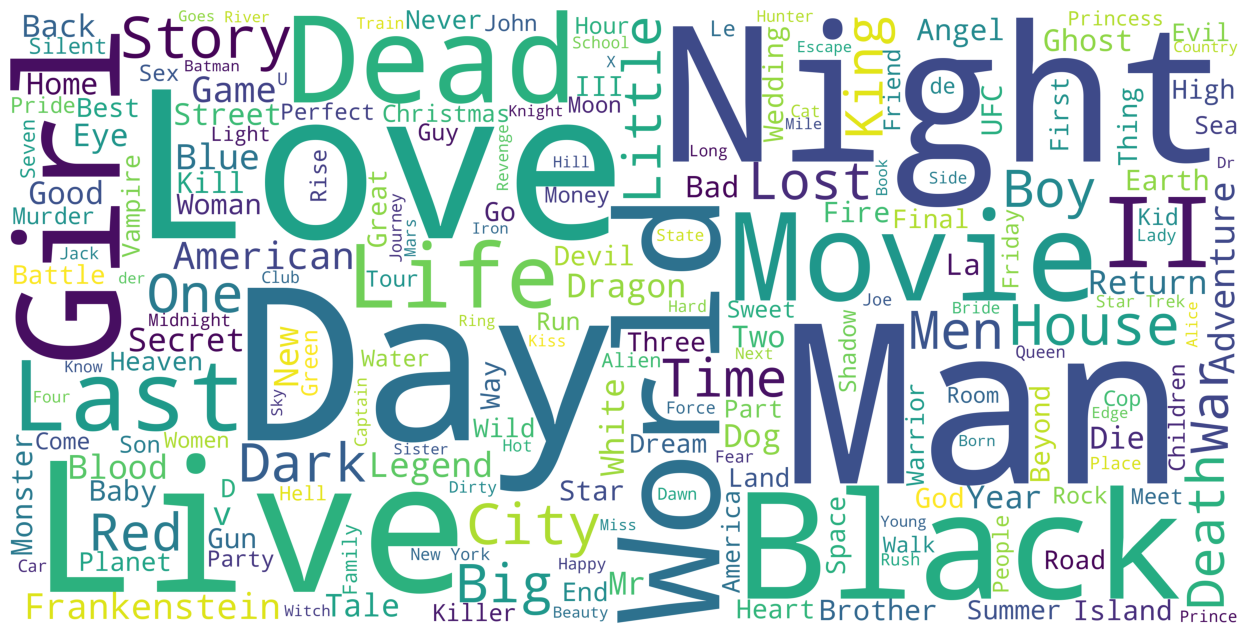

In [106]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Analysis:** The word **Love** is the most commonly used word in movie titles. **Man**, **Day**, **Live**, **Black**, **World**  and **Girl** are also among the most commonly occuring words.

### Production Countries

In [107]:
df['production_countries'].value_counts()

United States of America    4453
United Kingdom               594
none                         502
France                       455
Germany                      410
                            ... 
Colombia                       1
Czechoslovakia                 1
Cuba                           1
Costa Rica                     1
Qatar                          1
Name: production_countries, Length: 83, dtype: int64

Dataset consists of movies that are in the English language and mostly produced from USA. However, these movies may have shot in various locations around the world.

In [108]:
con_df = pd.DataFrame(df.groupby('production_countries').count()['id'].sort_values(ascending = False)[:10]).rename(columns={'id':'num_movies'})
con_df.reset_index(inplace=True)
con_df.rename(columns = {'production_countries' : 'country'},inplace = True)

In [109]:
con_df = con_df[(con_df['country'] != 'United States of America') & (con_df['country'] != 'none')]

In [110]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [111]:
# Top 10 productions countries outside of USA
con_df.head(10)

,country,num_movies
1,United Kingdom,594
3,France,455
4,Germany,410
5,India,316
6,Canada,308
7,Japan,179
8,Australia,139
9,Russia,129


### Production Companies

In [112]:
# Compute production companies in to series, stack, reset index and rename series name as companies
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [113]:
# Drop production_companies and replace join with 'companies' series column
com_df = df.drop('production_companies', axis=1).join(s)

In [114]:
# Calculate total, average and revenue count group by companies
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

#### Highest Earning Production Companies

Let us find out which production companies have earned the most money on average from the movie making business. The top 10 production companies by average revenue are listed. 

In [115]:
com_pivot_new = com_pivot.drop(['none'])

In [116]:
com_pivot_new.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Paramount Pictures,46000886485,1.306843e+08,352
Universal Pictures,45349056817,1.295687e+08,350
Walt Disney Pictures,38346898198,2.799044e+08,137
Twentieth Century Fox Film Corporation,31538890156,1.176824e+08,268
Columbia Pictures,31182934760,1.463988e+08,213
New Line Cinema,15842508237,9.210761e+07,172
Warner Bros.,13229484707,9.382613e+07,141
Village Roadshow Pictures,12112252186,1.781214e+08,68
DreamWorks SKG,11215833563,1.752474e+08,64


#### Most Succesful Production Companies

Which production companies produce the most succesful movies on average, considering those companies that have made at least 15 movies.

In [117]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Lucasfilm,9932504046,4.514775e+08,22
Ingenious Film Partners,7369317931,3.684659e+08,20
Legendary Pictures,6194209689,3.260110e+08,19
Walt Disney Pictures,38346898198,2.799044e+08,137
DC Comics,3860365483,2.412728e+08,16
Amblin Entertainment,3070708621,2.047139e+08,15
Studio Babelsberg,2949819862,1.843637e+08,16
Village Roadshow Pictures,12112252186,1.781214e+08,68
DreamWorks SKG,11215833563,1.752474e+08,64


### Original Language

In [118]:
df['original_language'].drop_duplicates().shape[0]

54

In [119]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,7001,en
fr,264,fr
de,193,de
ja,135,ja
hi,131,hi


Let us represent the most popular languages (apart from English) in the form of a bar plot.

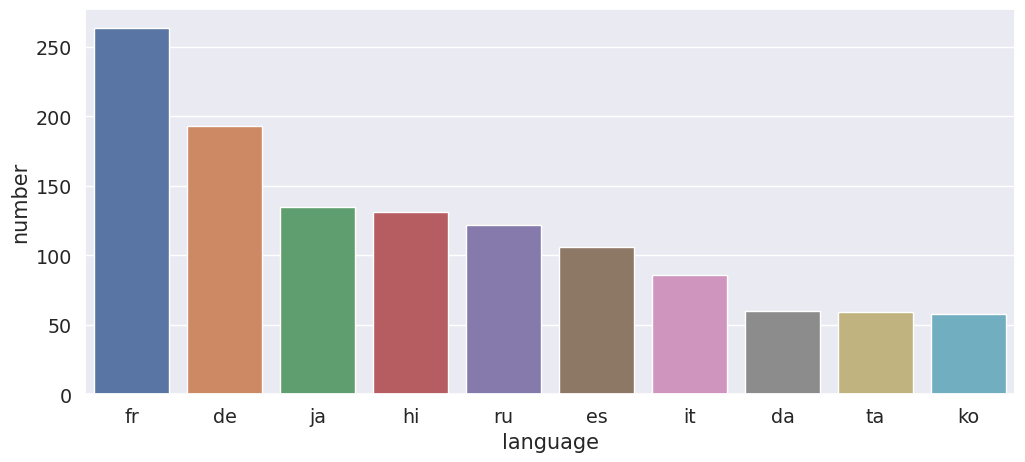

In [120]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

### Movie Release Dates

In [121]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [122]:
def get_month(x):
    try:
        return month_order[int(str(x).split('/')[1]) - 1]
    except:
        return np.nan

In [123]:
def get_day(x):
    try:
        day, month, year = (int(i) for i in x.split('/'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [124]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<AxesSubplot:title={'center':'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

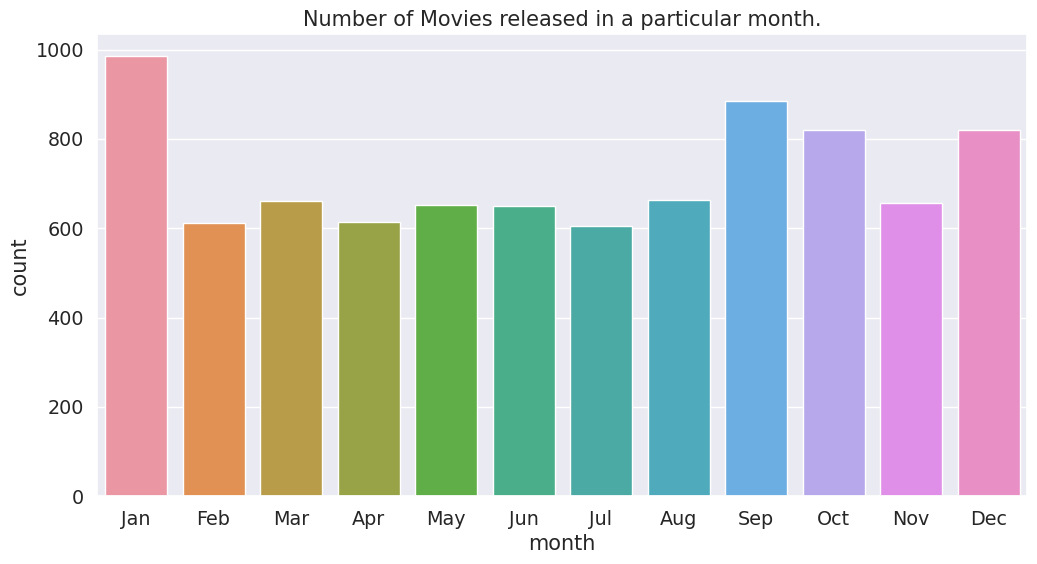

In [125]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<AxesSubplot:title={'center':'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

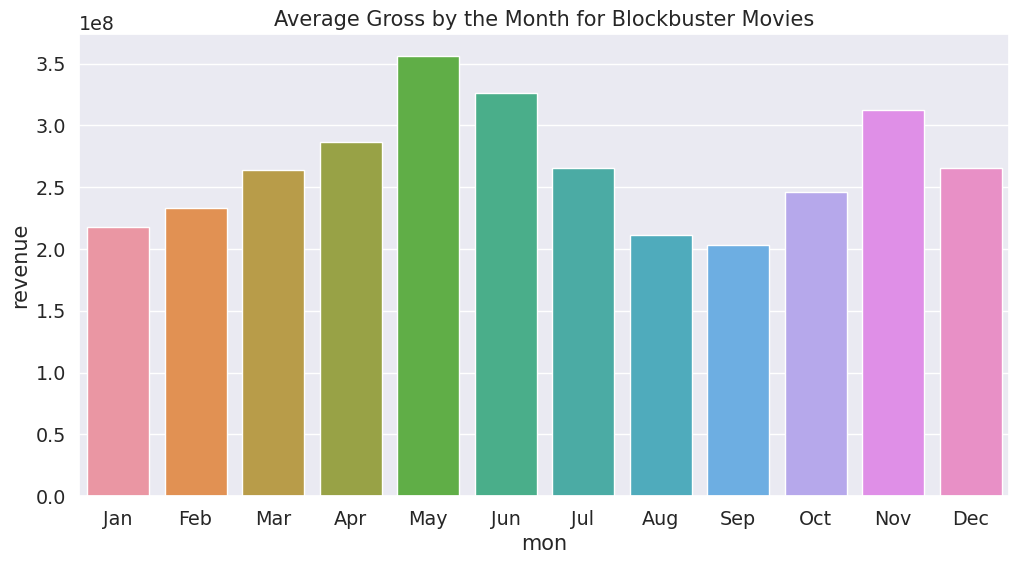

In [126]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

In general, revenue **inversely proportional** to the number of movies released per month except for holiday month in December. More movies do not mean more revenue during non-holiday seasons. 

(-1.0, 14.0)

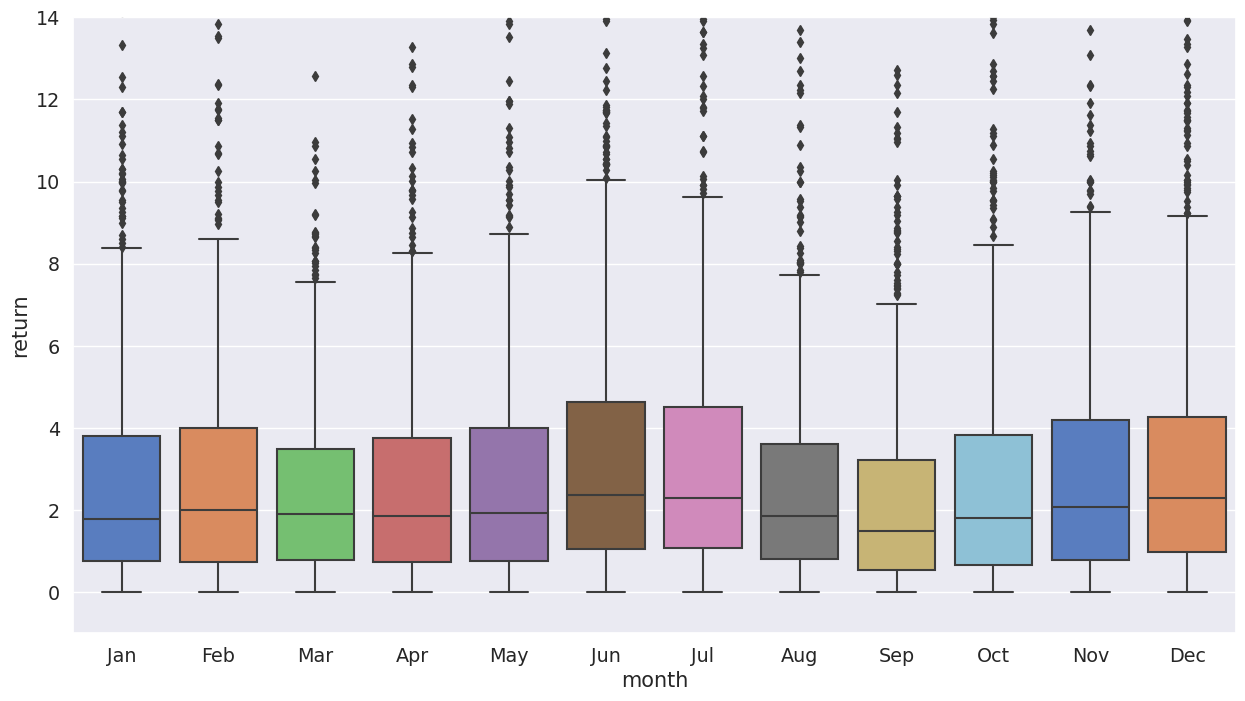

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([-1, 14])

<AxesSubplot:title={'center':'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

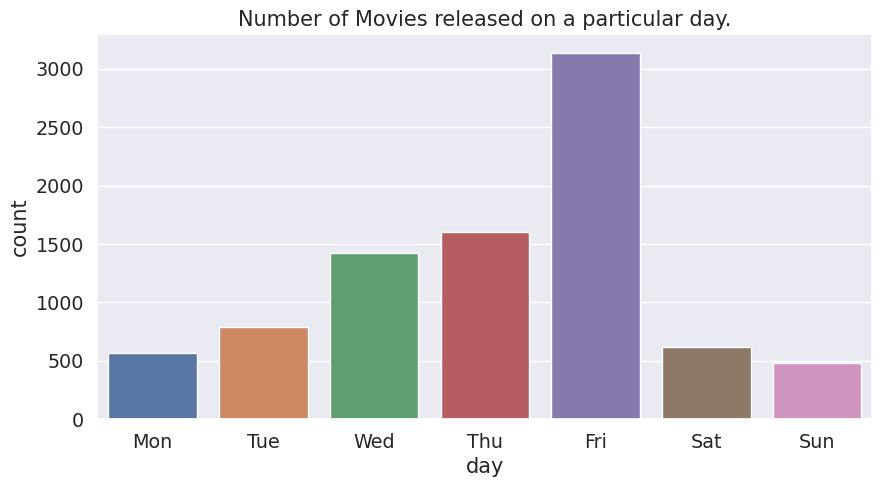

In [128]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

**Friday** is the most popular day for movie releases. 

#### Number of Movies by the year

In [177]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

<AxesSubplot:xlabel='year', ylabel='movie counts'>

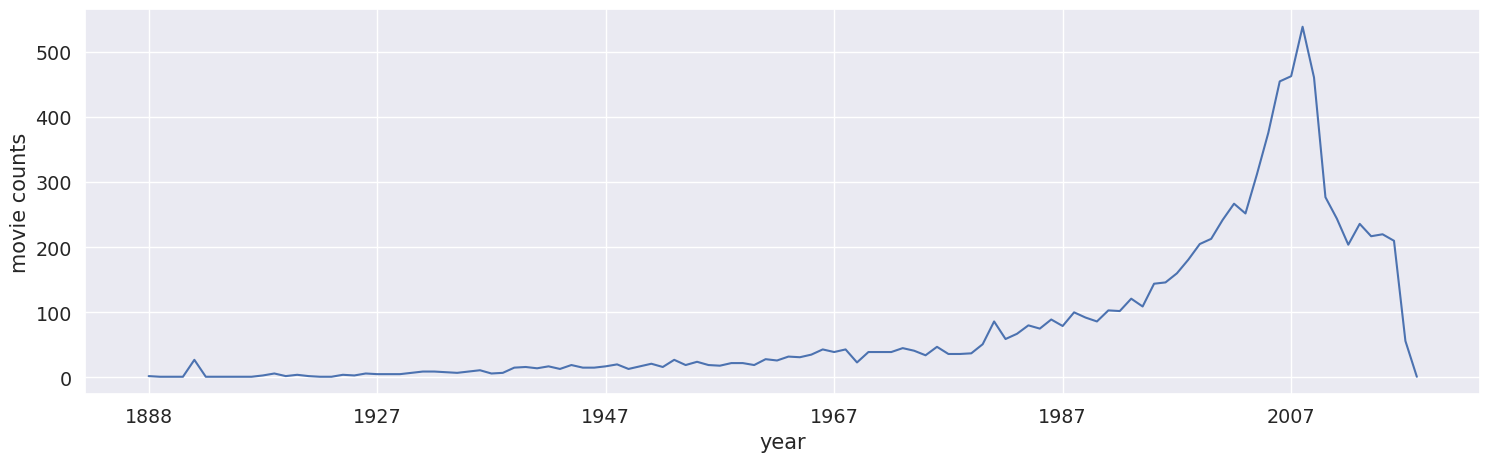

In [130]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
plt.ylabel('movie counts')
year_count.plot()

We notice that there is a sharp rise in the number of movies **starting the 1990s decade.**

#### Earliest Movies Represented

In [131]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
10076,Traffic Crossing Leeds Bridge,1888
10075,Roundhay Garden Scene,1888
10134,Un bon bock,1892
10135,Blacksmith Scene,1893
616,Workers Leaving the Lumière Factory,1895
12497,"Männer sind primitiv, aber glücklich!",1900
19925,Mortiis: Soul In A Hole,1900
19913,Macabre: Live in Holland 2005 - True Tales Of ...,1900
11536,Breeding Ian Jay,1900
19675,visions,1900


In [132]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [133]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month'>

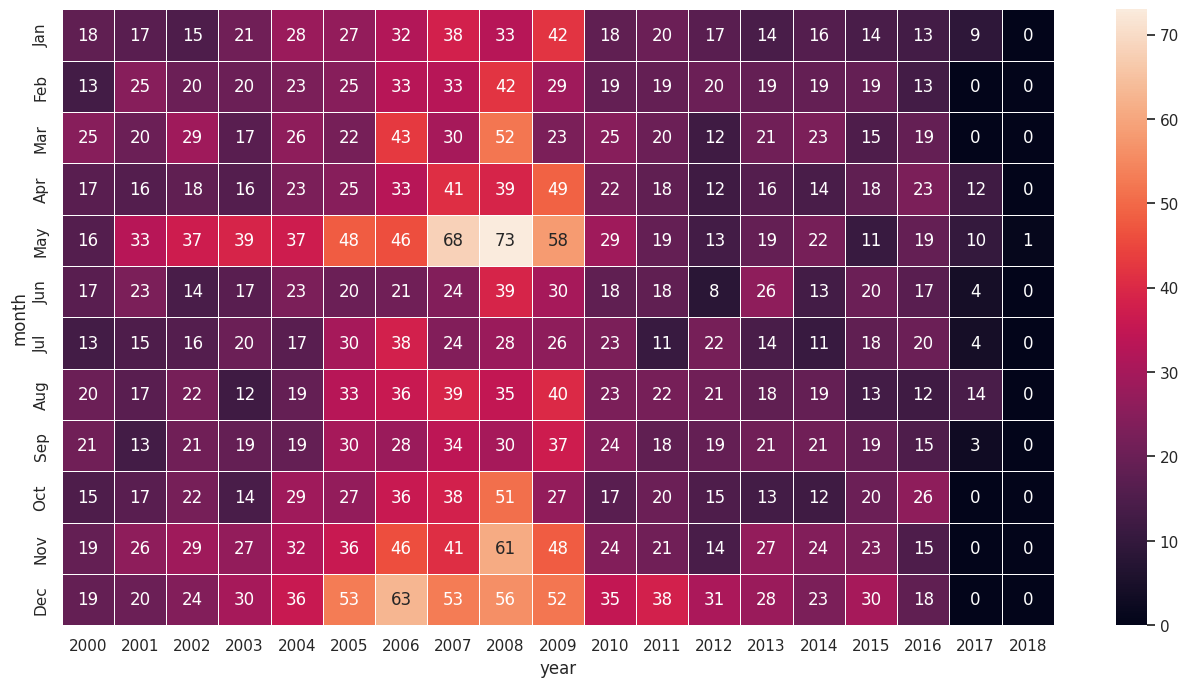

In [134]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

**December** is the popular month to release movie. 

In [135]:
sns.set(font_scale=1.25)

### Runtime

In [136]:
df['runtime'].describe()

count    8612.000000
mean      103.639573
std        31.667088
min         0.000000
25%        91.000000
50%       101.000000
75%       116.000000
max       720.000000
Name: runtime, dtype: float64

In [137]:
df['runtime'] = df['runtime'].astype('float')

<AxesSubplot:xlabel='runtime', ylabel='Density'>

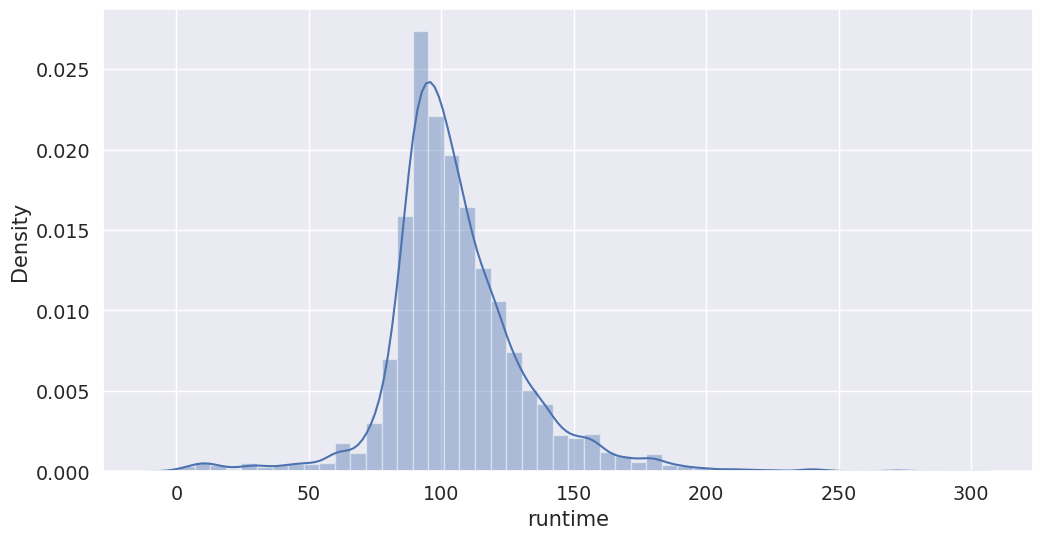

In [138]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

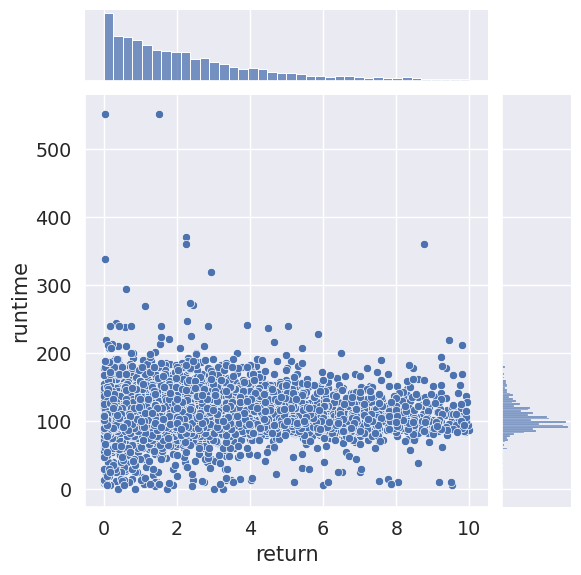

In [139]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

**No significant correlation pattern** is established between runtime vs return.

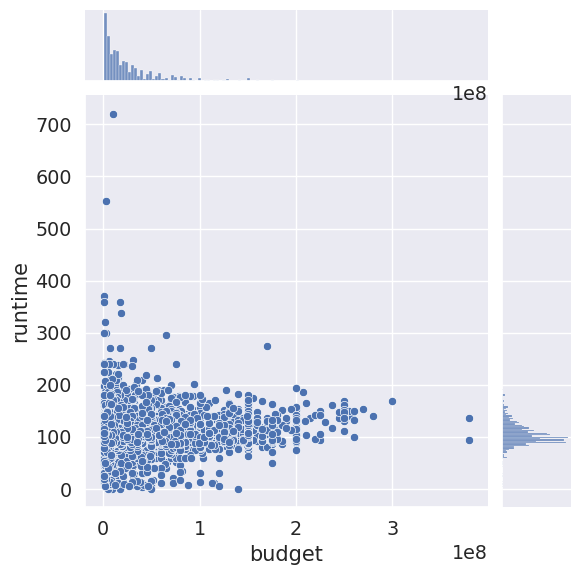

In [140]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

**No significant correlation pattern** is established between runtime vs budget.

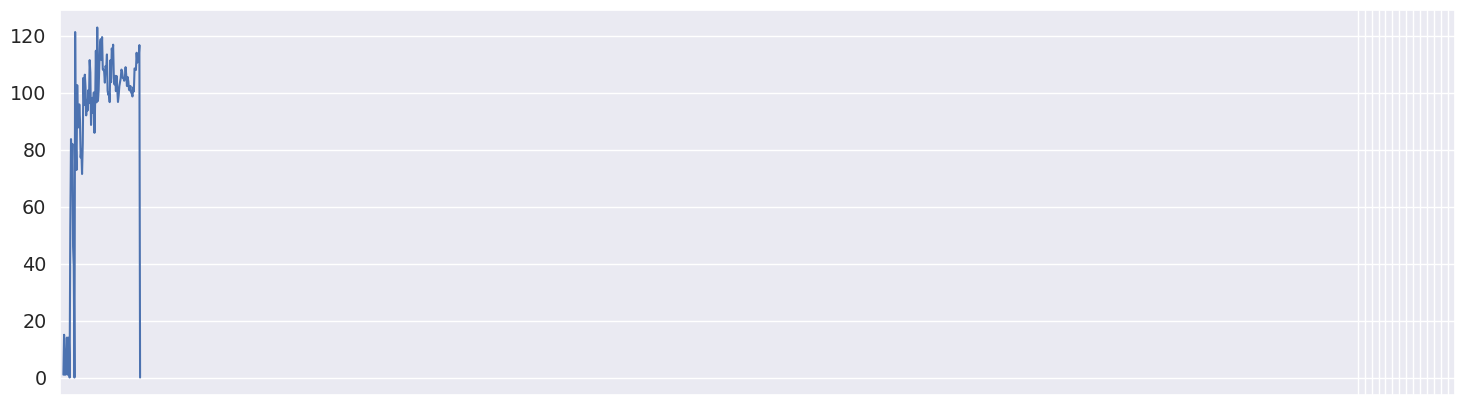

In [141]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

#### Shortest Movies

In [142]:
# Shortest movies vs revenue
df[df['runtime'] > 0][['runtime', 'title', 'year', 'revenue']].sort_values('runtime').head(10)

,runtime,title,year,revenue
10075,1.0,Roundhay Garden Scene,1888,87134280
10135,1.0,Blacksmith Scene,1893,3813293
10076,1.0,Traffic Crossing Leeds Bridge,1888,6735922
10077,1.0,The Infernal Caldron,1903,27105095
616,1.0,Workers Leaving the Lumière Factory,1895,456758981
1891,4.0,Prélude,2004,538400000
8230,4.0,Geri's Game,1997,96618699
11004,5.0,She and Her Cat: Their Standing Points,1999,169956806
10080,5.0,The Spirit of Christmas,1995,44800000
62,6.0,Kunstgriff,2002,71923560


**No clear relationship** between shortest movie and revenue

#### Longest Movies

In [143]:
# Longest movie vs revenue
df[df['runtime'] > 0][['runtime', 'title', 'year', 'revenue']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year,revenue
19506,720.0,From the Earth to the Moon,1998,103300000
10798,552.0,Into the West,2005,4529892
20776,552.0,Atheist Alliance International Convention 2007,2008,107559
1694,371.0,Jesus of Nazareth,1977,2023414
1880,360.0,Mauregard,1970,38376497
15931,360.0,How Soon Is Now?,2007,3000000
28616,338.0,Carlos,2010,871279
78580,320.0,Gangs of Wasseypur,2012,4100000
198529,300.0,Def Comedy Jam Classics: Volume Two,2006,10000000
1667,300.0,L'île aux trente cercueils,1979,127392239


**No clear relationship** between shortest movie and revenue

### Budget

In [144]:
df['budget'].describe()

count    8.628000e+03
mean     2.916749e+07
std      3.696269e+07
min      3.100000e+05
25%      5.500000e+06
50%      1.600000e+07
75%      3.800000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:xlabel='budget', ylabel='Density'>

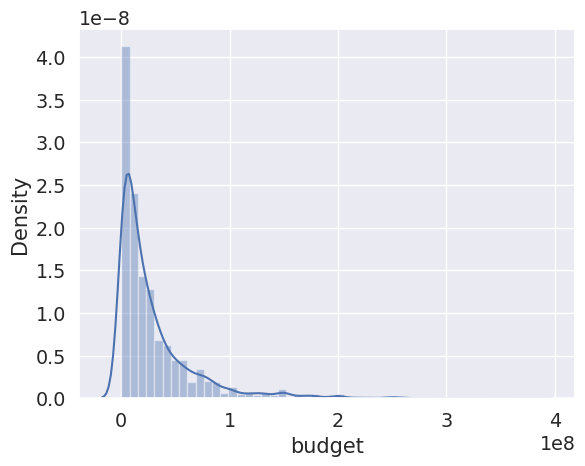

In [145]:
sns.distplot(df[df['budget'].notnull()]['budget'])

<AxesSubplot:ylabel='Frequency'>

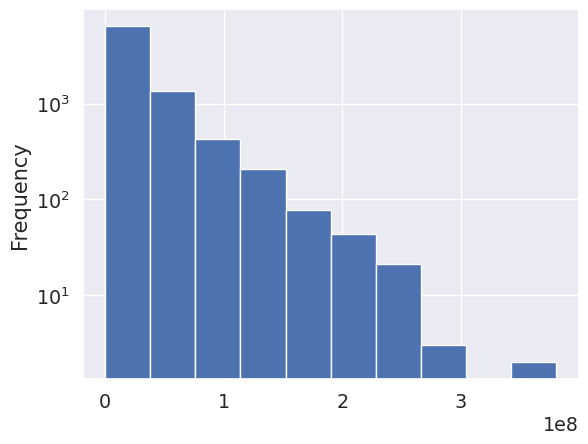

In [146]:
df['budget'].plot(logy=True, kind='hist')

#### Most Expensive Movies of all Time

In [147]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
1865,A Midsummer Night's Dream,380000000,1045713802,2.751878,1969
1243,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,2.751878,2011
238,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333,2007
68863,Avengers: Age of Ultron,280000000,1405035767,5.017985,2015
972,Superman Returns,270000000,391081192,1.448449,2006
33742,John Carter,260000000,284139100,1.092843,2012
217458,Transformers: The Last Knight,260000000,435353351,1.674436,2017
24758,Tangled,260000000,591794936,2.276134,2010
439,Spider-Man 3,258000000,890871626,3.452991,2007
39838,The Lone Ranger,255000000,89289910,0.350157,2013


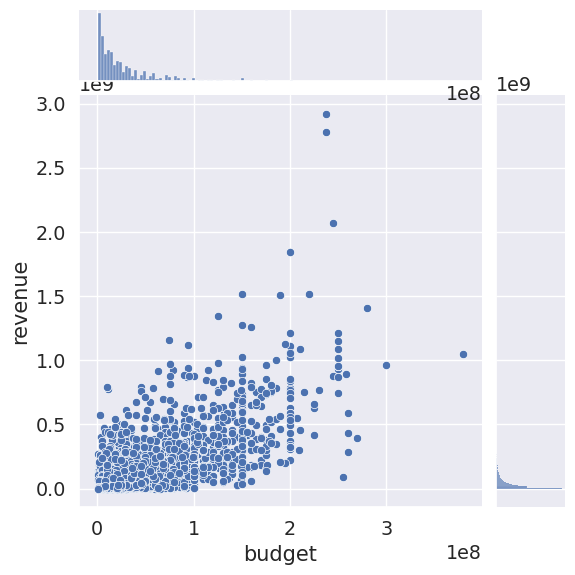

In [148]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

Plotting the correlations between “budget and revenue give visual confirmation of the connection between these elements

### Revenue

In [149]:
df['revenue'].describe()

count    8.628000e+03
mean     8.071537e+07
std      1.518270e+08
min      3.003000e+03
25%      7.339295e+06
50%      2.772812e+07
75%      8.832349e+07
max      2.920357e+09
Name: revenue, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='Density'>

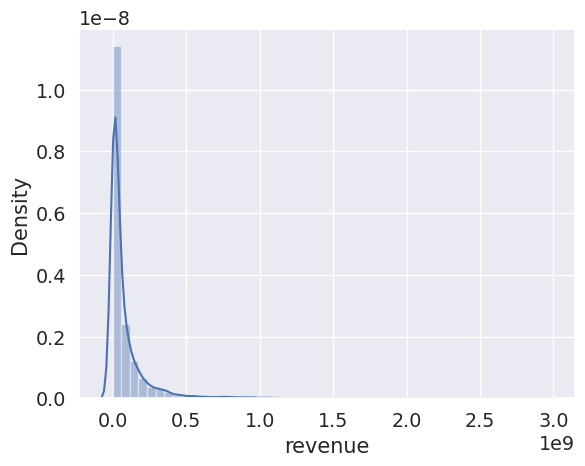

In [150]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

#### Highest Grossing Films of All Time

In [151]:
gross_top = df[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,title,budget,revenue,year
20007,Target,237000000,2920357254,1985
12176,Avatar,237000000,2781505847,2009
90036,Star Wars: The Force Awakens,245000000,2068223624,2015
474,Titanic,200000000,1845034188,1997
14586,The Avengers,220000000,1519557910,2012
24440,Happy Ending,220000000,1518815515,2010
87507,Jurassic World,150000000,1513528810,2015
102967,Furious 7,190000000,1506249360,2015
68863,Avengers: Age of Ultron,280000000,1405035767,2015
7168,Harry Potter and the Deathly Hallows: Part 2,125000000,1342000000,2011


In [152]:
pd.set_option('display.max_colwidth', 50)

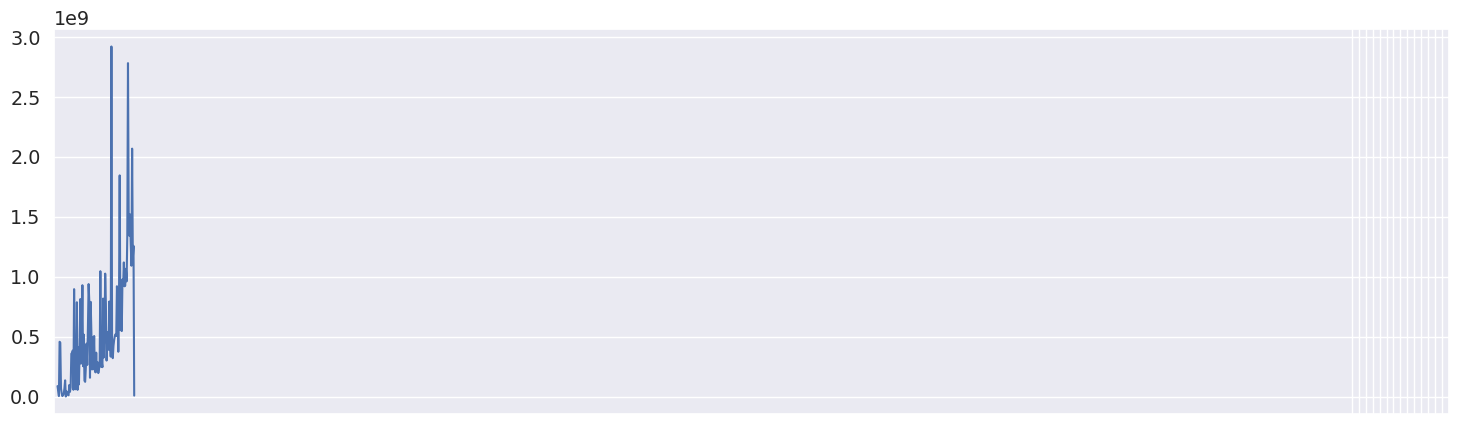

In [153]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

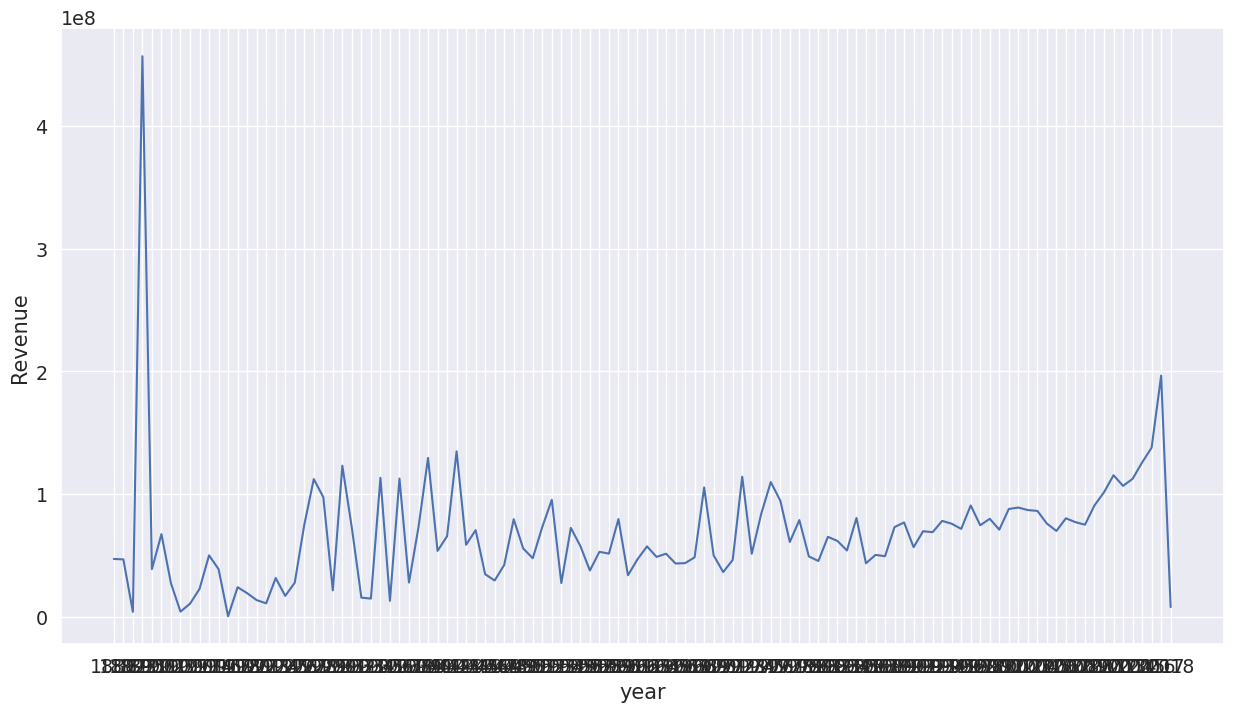

In [154]:
plt.figure(figsize=(15,8))
yearly=df.groupby(df['year'])['revenue'].agg('mean')
plt.plot(yearly.index,yearly)
plt.xlabel('year')
plt.ylabel("Revenue")
plt.savefig('fig')

### Returns

#### Most Successful Movies

In [155]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
601,Gentlemen Prefer Blondes,10500000,792965500,75.520524,1953
478,E.T. the Extra-Terrestrial,10500000,792910554,75.515291,1982
6,Star Wars,11000000,775398007,70.490728,1977
456,Jaws,7000000,470654000,67.236286,1975
4781,The Exorcist,8000000,441306145,55.163268,1973
583,Four Weddings and a Funeral,6000000,254700832,42.450139,1994
195,The Godfather,6000000,245066411,40.844402,1972
9560,White Heat,11000000,441306145,40.118740,1949
9502,Welcome,7500000,296999813,39.599975,2009
4729,Look Who's Talking,7500000,296000000,39.466667,1989


#### Worst Box Office Disasters

In [156]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
1629,In the Name of the King: A Dungeon Siege Tale,60000000,30857,0.000514,2007
5002,The Hills Have Eyes 2,15000000,10188,0.000679,2007
3035,Chaos,12000000,10289,0.000857,2005
34610,5 Days of War,20000000,17479,0.000874,2011
53198,Special Forces,10000000,10759,0.001076,2011
78150,Foodfight!,65000000,73706,0.001134,2012
16306,The Mystery of the Marie Celeste,12000000,14059,0.001172,1935
3101,Finder's Fee,10000000,12000,0.001200,2001
2064,"The Tulse Luper Suitcases, Part 3: From Sark t...",10000000,12000,0.001200,2004
74432,Laurence Anyways,9500000,12250,0.001289,2012


With these analyses in place, we are in a good position to construct our correlation matrix.

In [178]:
df['year'] = df['year'].replace('NaT', np.nan)

In [179]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [180]:
df['year'] = df['year'].apply(clean_numeric)

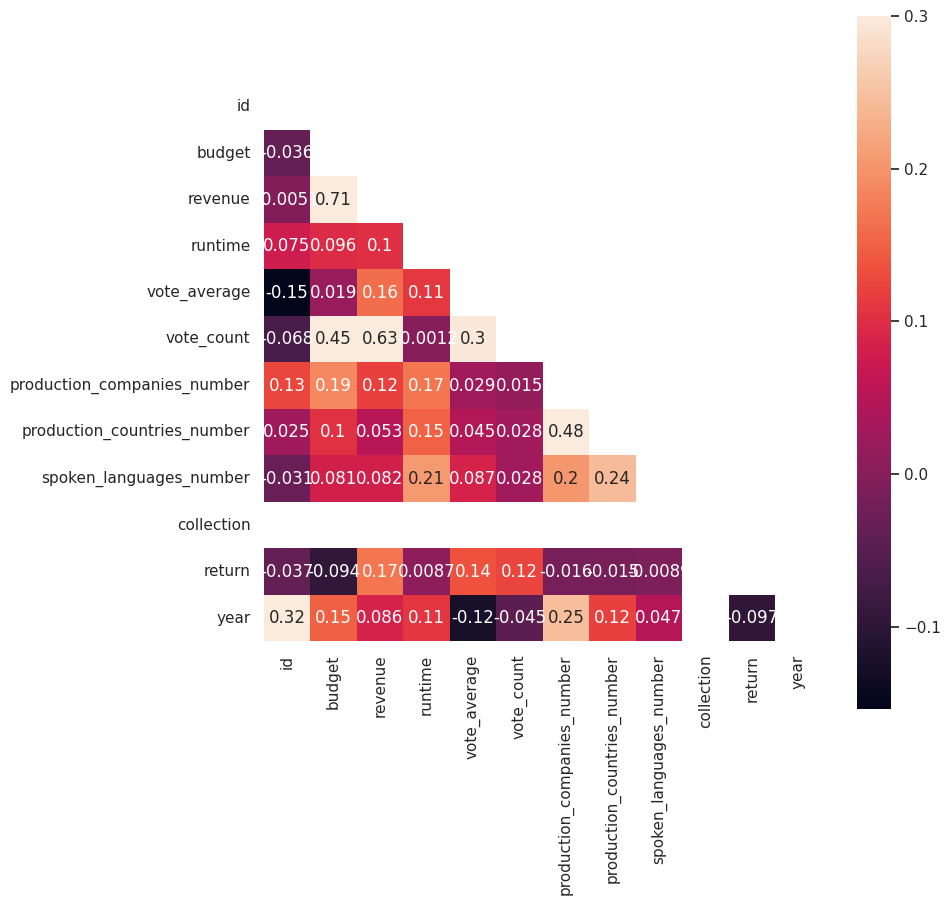

In [161]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [162]:
sns.set(font_scale=1.25)

### Genres

In [181]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [182]:
gen_df = df.drop('genres', axis=1).join(s)

In [183]:
gen_df

,id,budget,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,title,...,vote_count,production_companies_number,production_countries_number,spoken_languages_number,collection,return,day,month,year,genre
2,5,4000000,en,Four Rooms,Miramax Films,United States of America,25/12/1995,4300000,98.0,Four Rooms,...,485,2,1,1,1,1.075000,Mon,Dec,1995.0,Crime|Comedy
5,9,4000000,de,Sonntag im August,none,Germany,2/9/2004,4257354,15.0,Sunday in August,...,2256,0,1,1,1,1.064339,Thu,Sep,2004.0,Drama
6,11,11000000,en,Star Wars,Lucasfilm,United States of America,25/05/1977,775398007,121.0,Star Wars,...,6168,2,1,1,1,70.490728,Wed,May,1977.0,Adventure|Action|Science Fiction
7,12,94000000,en,Finding Nemo,Pixar Animation Studios,United States of America,30/05/2003,940335536,100.0,Finding Nemo,...,5531,1,1,1,1,10.003570,Fri,May,2003.0,Animation|Family
8,13,55000000,en,Forrest Gump,Paramount Pictures,United States of America,6/7/1994,677945399,142.0,Forrest Gump,...,7204,1,1,1,1,12.326280,Wed,Jul,1994.0,Comedy|Drama|Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318954,457236,55000000,en,Superman - The Movie: Restored International Cut,International Film Productions,United Kingdom,10/12/1978,134218018,188.0,Superman The Movie Restored International Cut,...,0,3,3,1,1,2.440328,Sun,Dec,1978.0,Action|Adventure|Drama|Family|Romance|Science ...
324095,463317,6200000,en,Barood,none,none,7/8/1998,10000000,166.0,Barood,...,1,0,0,1,1,1.612903,Fri,Aug,1998.0,NaN
327312,467210,22000000,es,Futbolín,100 Bares,Argentina,18/07/2013,25100000,NaN,Futbolín,...,1,3,2,0,1,1.140909,Thu,Jul,2013.0,Action|Animation|Adventure|Family|Romance
327522,467453,8100000,en,Race Gurram 2,none,India,2/7/2017,16000000,163.0,Race Gurram 2,...,0,0,1,2,1,1.975309,Sun,Jul,2017.0,Comedy|Action|Drama


In [184]:
gen_df['genre'].value_counts().shape[0]

1663

TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.

In [185]:
# Top 10 most common genres
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,650
1,Comedy,629
2,Drama|Romance,265
3,Comedy|Drama,209
4,Comedy|Romance,192
5,Documentary,186
6,Comedy|Drama|Romance,162
7,Horror,159
8,Horror|Thriller,132
9,Drama|Thriller,106


**Drama, Comedy and Romance** are the most common genre

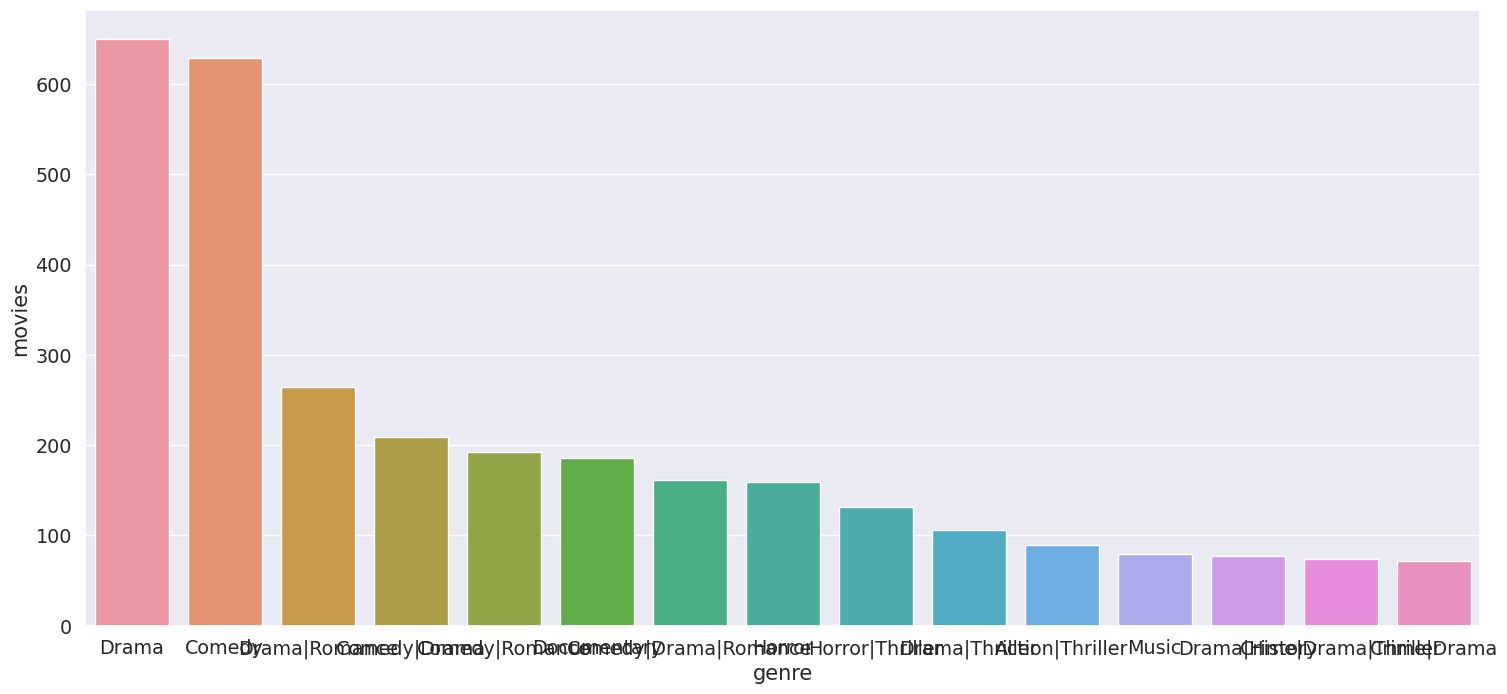

In [186]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [187]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Fantasy', 'Animation']

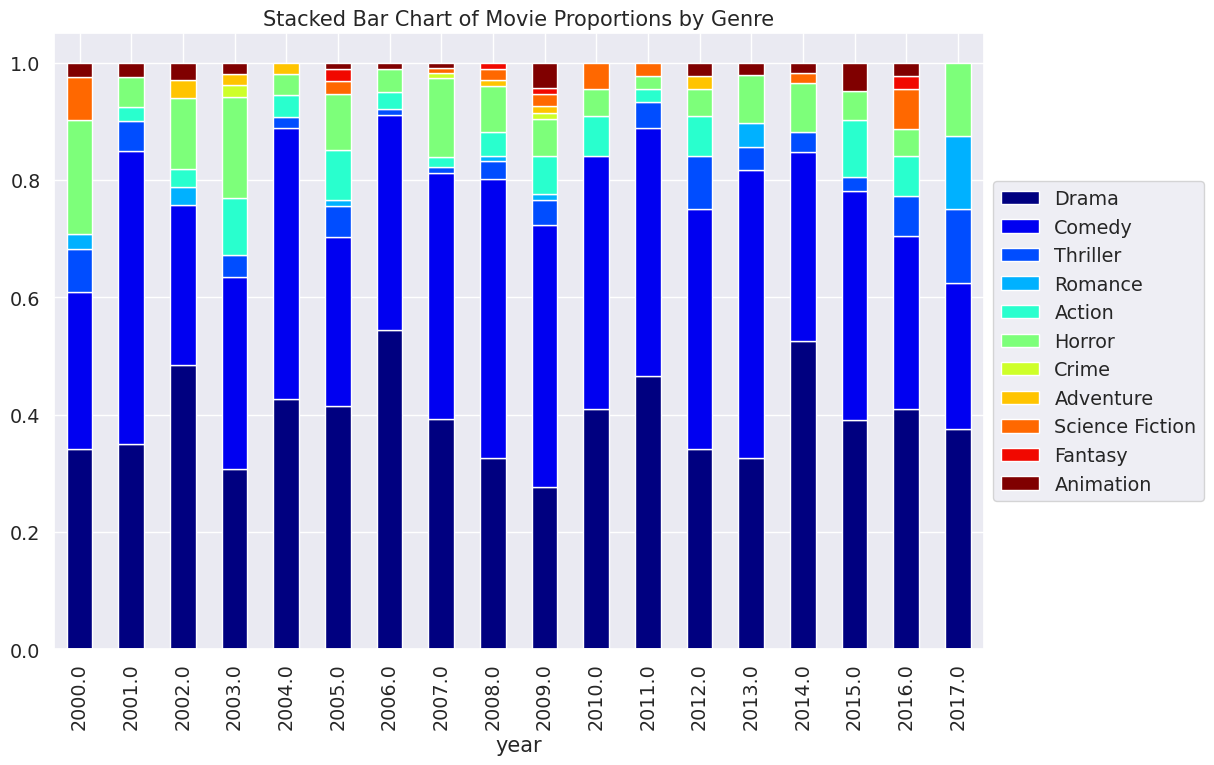

In [205]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

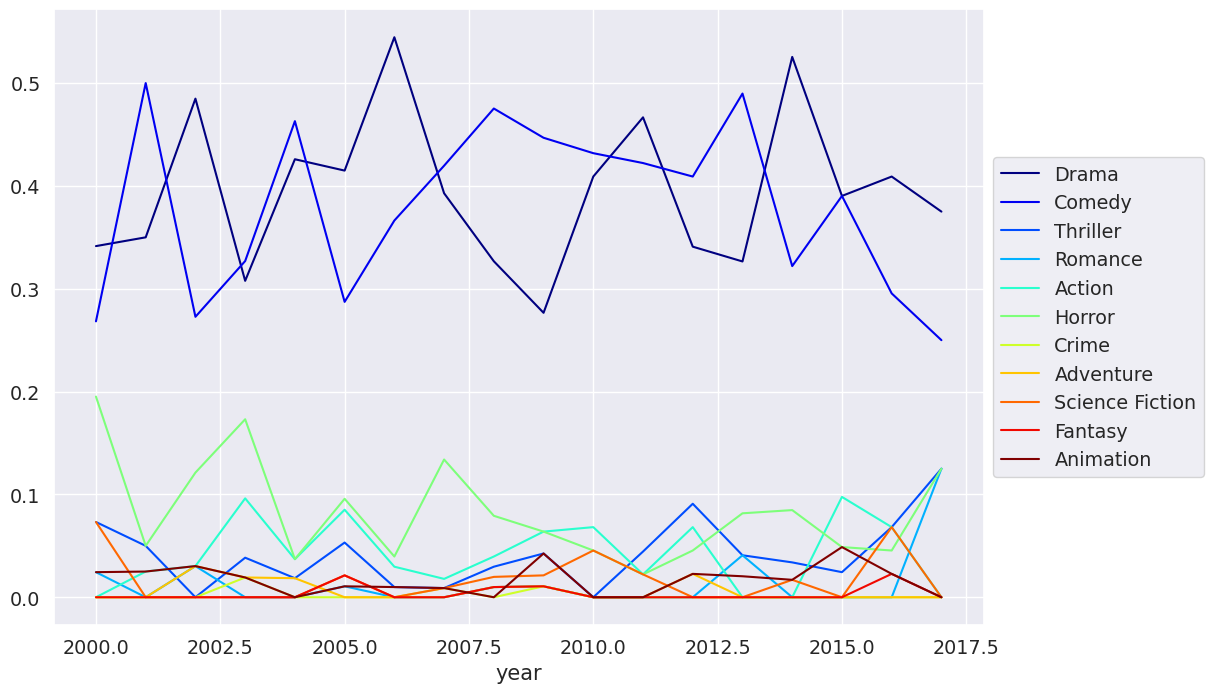

In [206]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [191]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1800x800 with 0 Axes>

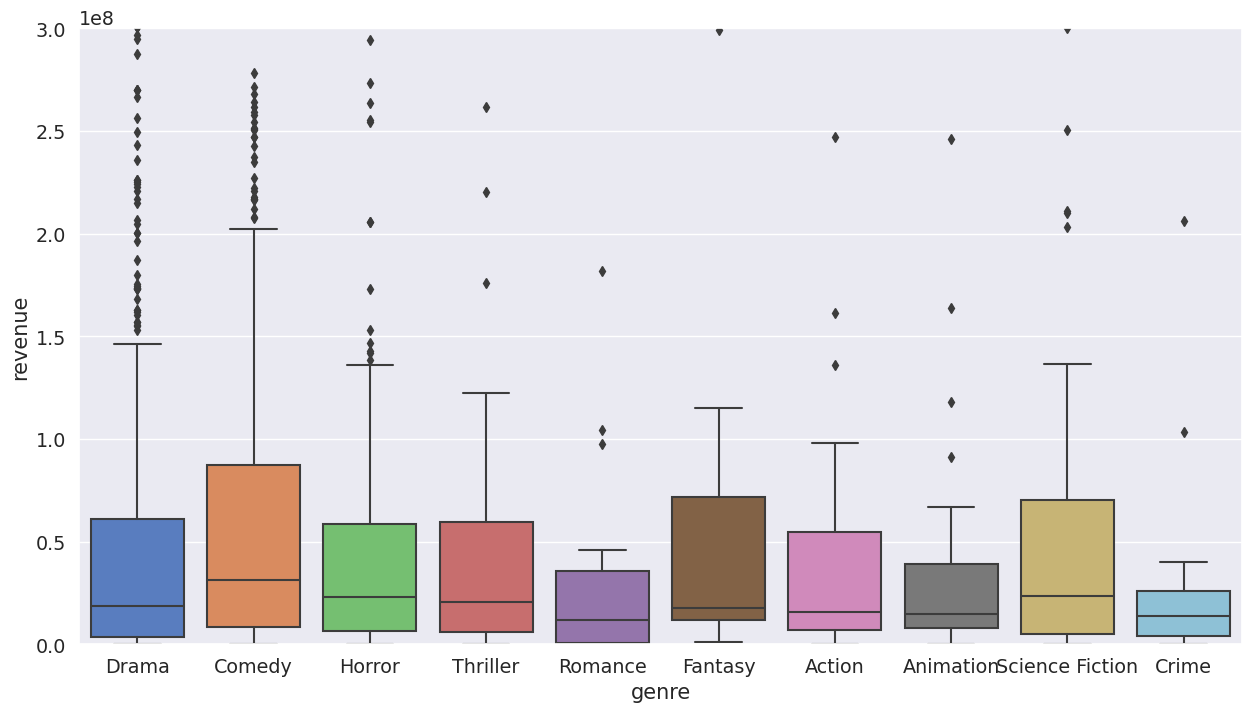

In [207]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

<Figure size 1800x800 with 0 Axes>

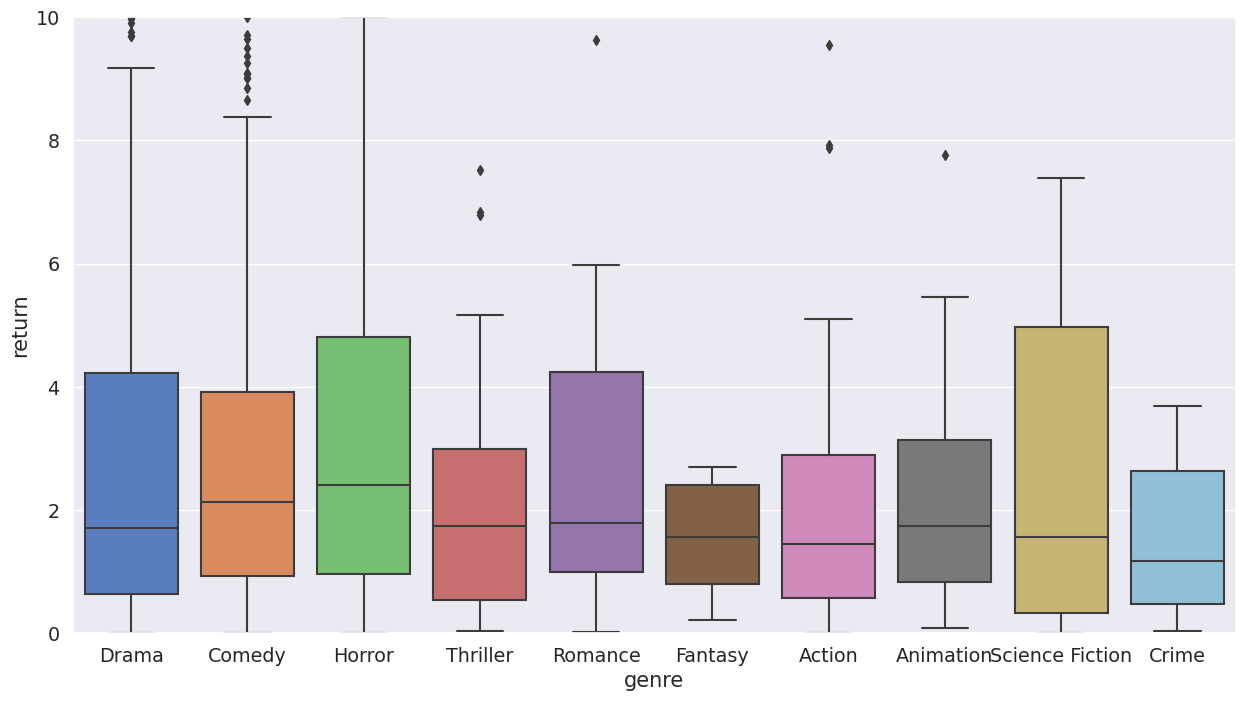

In [79]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

### Cast and Crew

In [193]:
credits_df = pd.read_csv('../data/AllMoviesCastingRaw.csv', delimiter=';')
credits_df.head()

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny


In [194]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [195]:
df['id'] = df['id'].apply(convert_int)

In [196]:
df[df['id'].isnull()]

,id,budget,genres,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,collection,return,day,month,year


In [197]:
df

,id,budget,genres,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,collection,return,day,month,year
2,5,4000000,Crime|Comedy,en,Four Rooms,Miramax Films,United States of America,25/12/1995,4300000,98.0,...,6.5,485,2,1,1,1,1.075000,Mon,Dec,1995
5,9,4000000,Drama,de,Sonntag im August,none,Germany,2/9/2004,4257354,15.0,...,5.7,2256,0,1,1,1,1.064339,Thu,Sep,2004
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Lucasfilm,United States of America,25/05/1977,775398007,121.0,...,8.0,6168,2,1,1,1,70.490728,Wed,May,1977
7,12,94000000,Animation|Family,en,Finding Nemo,Pixar Animation Studios,United States of America,30/05/2003,940335536,100.0,...,7.6,5531,1,1,1,1,10.003570,Fri,May,2003
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,Paramount Pictures,United States of America,6/7/1994,677945399,142.0,...,8.2,7204,1,1,1,1,12.326280,Wed,Jul,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318954,457236,55000000,Action|Adventure|Drama|Family|Romance|Science ...,en,Superman - The Movie: Restored International Cut,International Film Productions,United Kingdom,10/12/1978,134218018,188.0,...,0.0,0,3,3,1,1,2.440328,Sun,Dec,1978
324095,463317,6200000,NaN,en,Barood,none,none,7/8/1998,10000000,166.0,...,5.0,1,0,0,1,1,1.612903,Fri,Aug,1998
327312,467210,22000000,Action|Animation|Adventure|Family|Romance,es,Futbolín,100 Bares,Argentina,18/07/2013,25100000,NaN,...,9.0,1,3,2,0,1,1.140909,Thu,Jul,2013
327522,467453,8100000,Comedy|Action|Drama,en,Race Gurram 2,none,India,2/7/2017,16000000,163.0,...,0.0,0,0,1,2,1,1.975309,Sun,Jul,2017


In [198]:
# df = df.drop([19730, 29503, 35587])

In [199]:
df['id'] = df['id'].astype('int')

In [200]:
df = df.merge(credits_df, on='id')
df.shape

(8628, 39)

In [203]:
df

,id,budget,genres,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,...,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,5,4000000,Crime|Comedy,en,Four Rooms,Miramax Films,United States of America,25/12/1995,4300000,98.0,...,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
1,9,4000000,Drama,de,Sonntag im August,none,Germany,2/9/2004,4257354,15.0,...,none,0,2,Marc Meyer,0.0,2,Marc Meyer,1,none,Marc Meyer
2,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Lucasfilm,United States of America,25/05/1977,775398007,121.0,...,Alec Guinness,2,106,George Lucas,2.0,1,Gary Kurtz,2,none,Marcia Lucas
3,12,94000000,Animation|Family,en,Finding Nemo,Pixar Animation Studios,United States of America,30/05/2003,940335536,100.0,...,Brad Garrett,2,24,Andrew Stanton,2.0,1,Graham Walters,1,Andrew Stanton,David Ian Salter
4,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,Paramount Pictures,United States of America,6/7/1994,677945399,142.0,...,Sally Field,1,67,Robert Zemeckis,2.0,1,Wendy Finerman,3,Eric Roth,Arthur Schmidt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,457236,55000000,Action|Adventure|Drama|Family|Romance|Science ...,en,Superman - The Movie: Restored International Cut,International Film Productions,United Kingdom,10/12/1978,134218018,188.0,...,Christopher Reeve,2,17,Richard Donner,2.0,1,Richard Lester,2,none,Stuart Baird
8624,463317,6200000,NaN,en,Barood,none,none,7/8/1998,10000000,166.0,...,none,0,2,none,1.0,0,none,0,none,none
8625,467210,22000000,Action|Animation|Adventure|Family|Romance,es,Futbolín,100 Bares,Argentina,18/07/2013,25100000,NaN,...,Salvador Aldeguer,0,15,Juan José Campanella,2.0,1,none,0,Juan José Campanella,none
8626,467453,8100000,Comedy|Action|Drama,en,Race Gurram 2,none,India,2/7/2017,16000000,163.0,...,none,0,0,none,1.0,0,none,0,none,none


In [204]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

KeyError: 'cast'

In [ ]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [ ]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
df['director'] = df['crew'].apply(get_director)

In [ ]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)



#### Actors with the Highest Total Revenue

NameError: name 'cast_df' is not defined

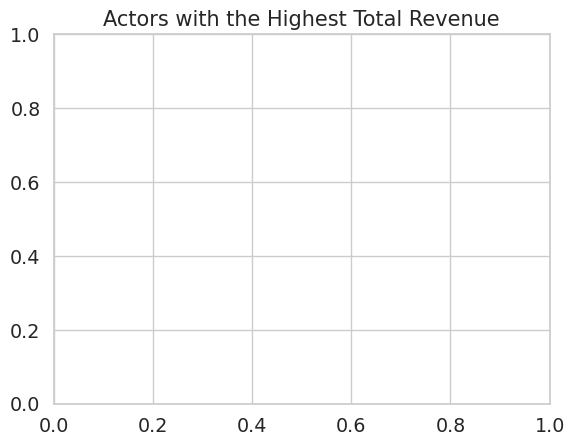

In [208]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

#### Directors with the Highest Total Revenue

In [ ]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [ ]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

#### Actors with Highest Average Revenue

In [ ]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

#### Directors with Highest Average Revenue

In [ ]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()



#### Most Successful Actors

In [ ]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

#### Most Successful Directors

In [ ]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

In [ ]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]